In [12]:
import numpy as np
import matplotlib.pyplot as plt
import re
import nltk
import pandas as pd

%matplotlib inline
plt.rcParams['figure.figsize'] = (12, 6)
plt.rcParams['figure.dpi'] = 300

# Who’s Afraid of ChatGPT?

## A Gentle Introduction to Text Analytics

John Laudun  
Department of English  
University of Louisiana at Lafayette  
johnlaudun@gmail.com  
https://johnlaudun.net/  
@johnlaudun@hcommons.social  

All of today's materials, and this notebook, are available at: http://github.com/johnlaudun/workshop

## Workshop Agenda

1. Understanding what AI/ML are and how they are involved in text analytics
2. Doing some "analytics" with a few texts
3. Exploring the possibilities

## Artificial Intelligence, Machine Learning, & You

- Machine learning used to be, and sometimes still is (in math departments) called **statistical learning**.
- Most machine learning is a mix of statistical operations with **calculus** and **linear algebra**.

### What that looks like:

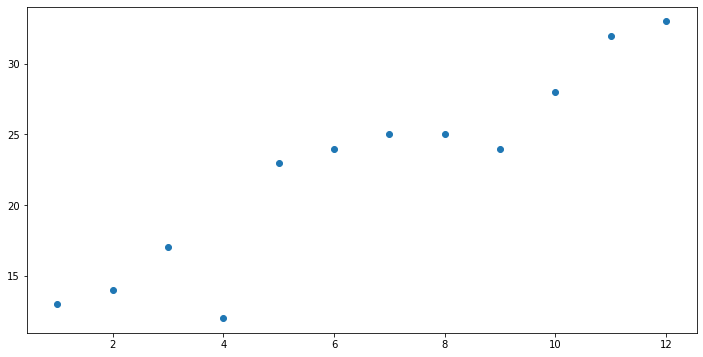

In [3]:
# our "data"
x = np.array([1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12])
y = np.array([13, 14, 17, 12, 23, 24, 25, 25, 24, 28, 32, 33])

# scatterplot
plt.plot(x, y, 'o')

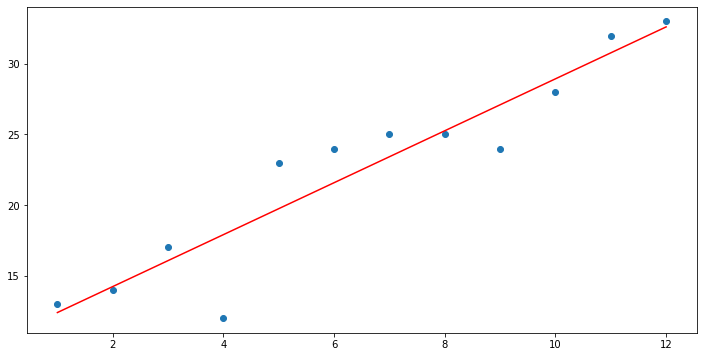

In [4]:
m, b = np.polyfit(x, y, 1)
plt.plot(x, y, 'o')
plt.plot(x, m*x+b, color='red')

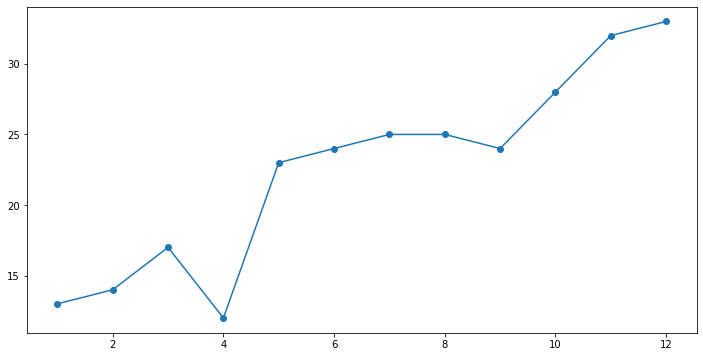

In [5]:
plt.plot(x, y, '-o')

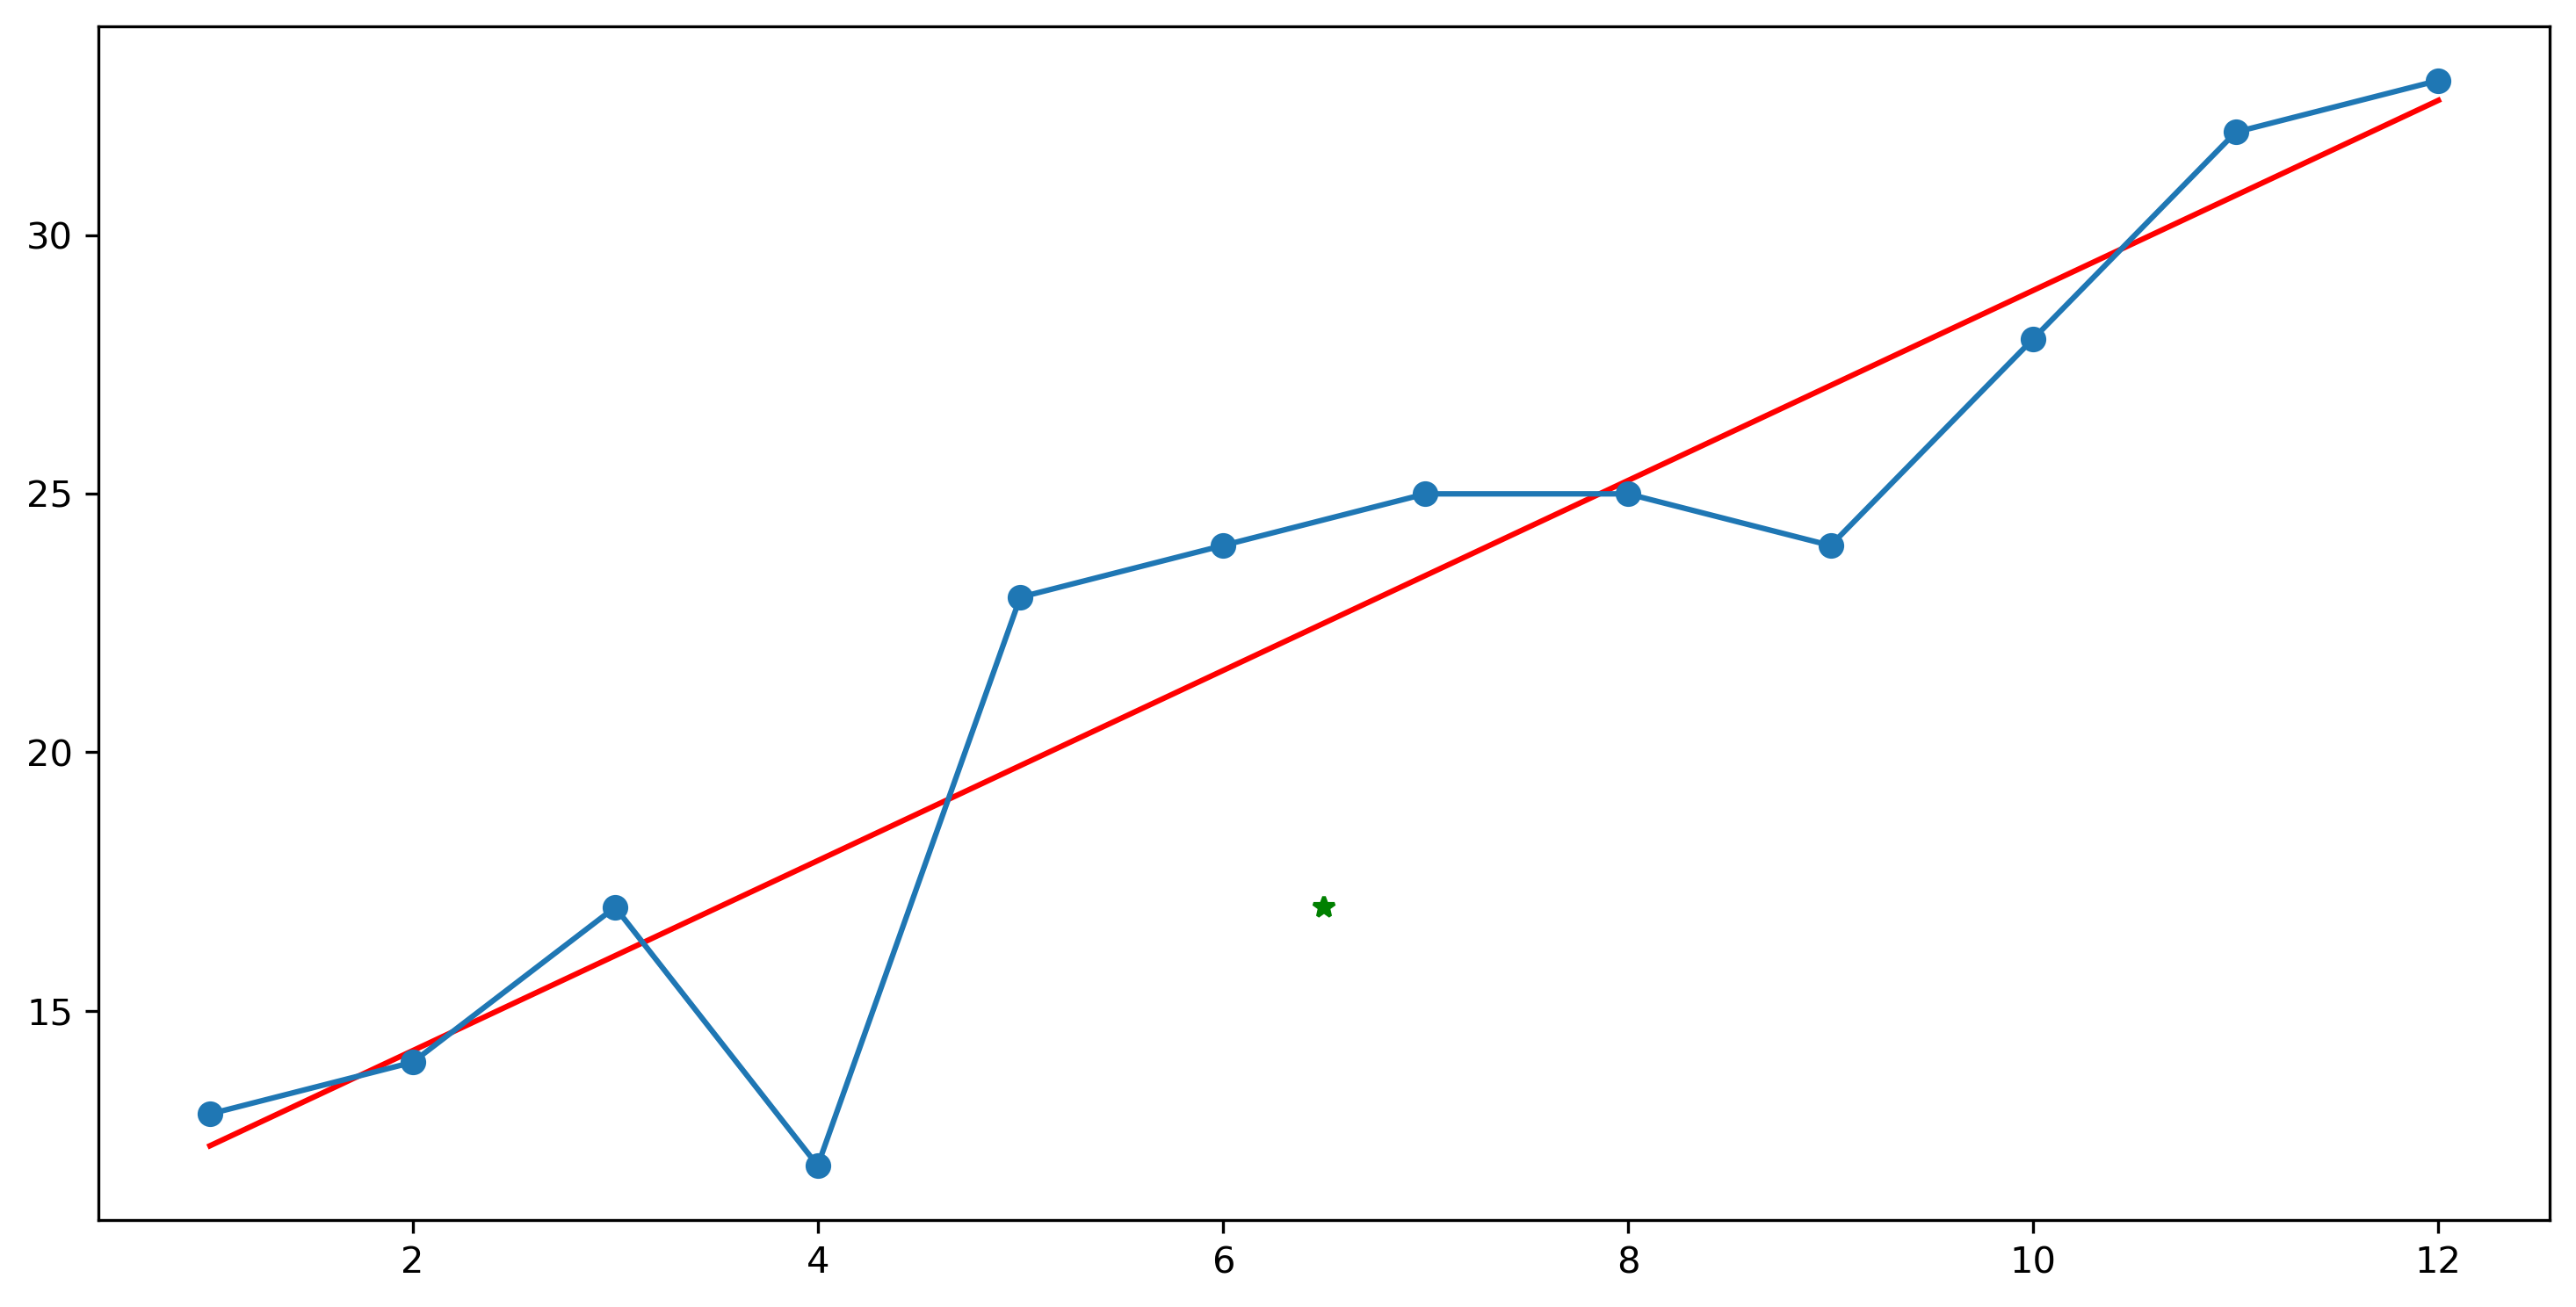

In [14]:
plt.plot(x, m*x+b, color='red')
plt.plot(x, y, '-o')
plt.plot(6.5, 17, 'g*')

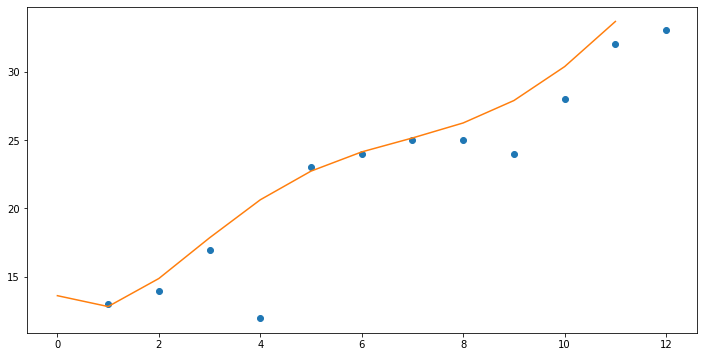

In [7]:
poly = np.polyfit(x, y, deg=5)
plt.plot(x, y, 'o')
plt.plot(np.polyval(poly, x))

In [8]:
print(f""" \n
y = {m:.2f} x  + {b:.2f}\n\n\n
versus \n\n\n
{np.poly1d(poly)}\n """)

 

y = 1.84 x  + 10.55



versus 



           5           4          3         2
-0.001329 x + 0.05307 x - 0.7637 x + 4.796 x - 10.59 x + 20.14
 


## The Math Involved

- **Linear Algebra** to handle lots of "dimensions"
- **Statistics** and **calculus** to determine possible relationships between the dimensions.

## Dimensions?!

```
Text 1 = "Mary had a little lamb whose fleece was white as snow."
Text 2 = "And everywhere that Mary went, the lamb was sure to go."

t1 = [1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11]
t2 = [12, 13, 14, 1, 15, 16, 5, 8, 17, 18, 19]
```

But there are 12 lines: the resulting matrix for this poem would be ...

In [9]:
# First we load our file into a string
lamb = open('texts/marys-lamb.txt', 'r').read()

# Then we turn that string into a list of words
lamb_words = re.sub("[^a-zA-Z']"," ", lamb).lower().split()

# Now let's determine the unique words & count them
unique_words = set(lamb_words)
print(f"There are {len(unique_words)} unique words in this text.\n")
print(f"Those words are: {unique_words}.\n")
print(f"The matrix for this text would be 12 x 96.")

There are 96 unique words in this text.

Those words are: {'your', 'eager', 'a', 'if', 'll', 'kind', 'did', 'animal', 'said', 'to', 'may', 'near', 'sure', 'out', 'arm', 'upon', 'follow', 'laid', 'smile', 'turned', 'made', 'it', 'school', 'children', 'day', 'afraid', 'snow', 'appear', 'and', 'always', 'oh', 'rule', 'me', 'against', 'her', 'bind', 'had', 'know', 'his', 'reply', 'makes', 'all', 'mary', 'its', 'are', 'then', 'fleece', 'or', 'gentle', 'what', 'them', 'black', 'white', 'everywhere', 'teacher', 'not', 'was', 'went', 'him', 'at', 'lingered', 'but', 'you', 'ran', 'till', 'keep', 'play', 'each', 'see', 'laugh', 'patiently', 'one', 'coal', 'that', 'followed', 'the', 'loves', 'harm', 'little', 'lamb', 'love', 'in', 'as', 'from', 'he', 'confidence', 'about', 'waited', 'm', 'go', 'call', 'still', 'head', 'make', 'i', 'so'}.

The matrix for this text would be 12 x 96.


Imagine a table 12 rows deep by 96 columns wide -- most scientific disciplines make each example, or observation, a row, and then they make each feature a column:

In [10]:
from sklearn.feature_extraction.text import CountVectorizer
vectorizer = CountVectorizer()

with open('texts/marys-lamb.txt', 'r') as the_file:
    lines = the_file.readlines()

vectors = vectorizer.fit_transform(lines)
td = pd.DataFrame(vectors.todense())
td.columns = vectorizer.get_feature_names_out()
td.head()

,about,afraid,against,all,always,and,animal,appear,are,arm,...,to,turned,upon,waited,was,went,what,white,you,your
0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,1,0,0,1,0,0
2,0,0,0,0,0,1,0,0,0,0,...,0,0,0,0,0,1,0,0,0,0
3,0,0,0,0,0,0,0,0,0,0,...,1,0,0,0,1,0,0,0,0,0
4,0,0,0,0,0,0,0,0,0,0,...,1,0,0,0,0,0,0,0,0,0


This is where linear algebra comes into play: we can pull the **term-document matrix** as this is called into two smaller matrices (factor it) in a way that, potentially, reveals key word clusters. (This is one form of *topic modeling*.)

<AxesSubplot:>

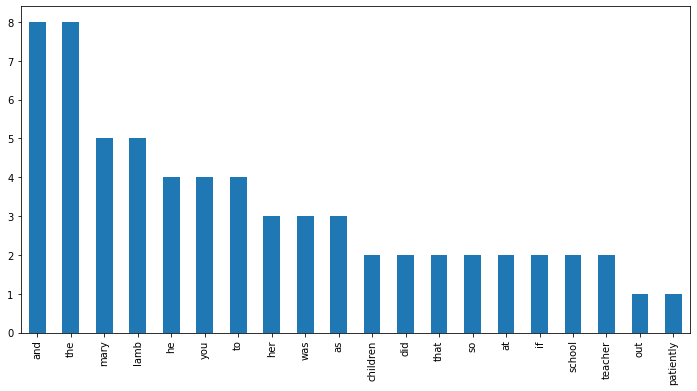

In [11]:
tdm = td.T
tdm['total_count'] = tdm.sum(axis=1)
tdm = tdm.sort_values(by ='total_count', ascending=False)[:20]
tdm['total_count'].plot.bar()
# tdm.head()

## But are all the words worth counting?